# 03 - Regression Modeling

## I. Data Extraction

In [1]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from re import sub
from decimal import Decimal
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.style as style 
%matplotlib inline

    **PTS**: points
    **MP**: minutes played
    **PER**: player efficiency rating
    **VORP**:value over replacement player
    **BPM**: box plus/min-->evaluate player's quality and contribution to the team.
    **WS48**: the number of wins a player produces for his team in 48 mins
    **TOV**: turnover per game-->when a team loses possession of the ball to the opposing team before a player takes a shot at their team's basket.
    **STL**: steal per game

In [152]:
#read data
nba_data = pd.read_pickle('./player_salary.pkl')
player_salary_num=pd.read_pickle('./player_salary_num.pkl')

In [154]:
player_salary_num.head()

Age  GS    eFG   PF   PTS   WS     G      MP   PER    PAR  ...   ORtg  \
0   29  77  0.490  2.0  10.5  2.1  82.0  2607.0  10.0  0.598  ...  100.0   
1   30   1  0.545  1.6   9.9  3.5  82.0  1908.0  13.2  0.609  ...  112.0   
2   31  82  0.565  2.2  12.1  6.0  82.0  2568.0  13.4  0.602  ...  110.0   
3   24  15  0.487  2.3   8.4  0.9  82.0  1931.0  10.8  0.281  ...   97.0   
4   33  82  0.535  3.1   7.3  5.0  82.0  2802.0   9.2  0.740  ...  114.0   

    DRtg  OWS  DWS   WS48  OBPM  DBPM  BPM  VORP      Salary  
0  111.0 -0.4  2.5  0.038  -1.3   0.6 -0.8   0.8   4384616.0  
1  114.0  2.2  1.2  0.087   1.5  -2.0 -0.5   0.7  11571429.0  
2  107.0  2.5  3.6  0.113   1.0   0.8  1.8   2.5  13045455.0  
3  112.0 -0.9  1.7  0.022  -3.3   1.1 -2.2  -0.1   1634640.0  
4  110.0  2.0  3.0  0.086  -0.5   1.8  1.3   2.3   7969537.0  

[5 rows x 29 columns]

## II. Regression Model Building

Goal:

1. K_Fold to get test and train cross validation
2. Run Linear Regression, Lasso Regression, Ridge Regression and compare results
3. Choose the best model that has the lowest MAE and highest R^2
4. Coefficient interpretation based on the best model 

In [80]:
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

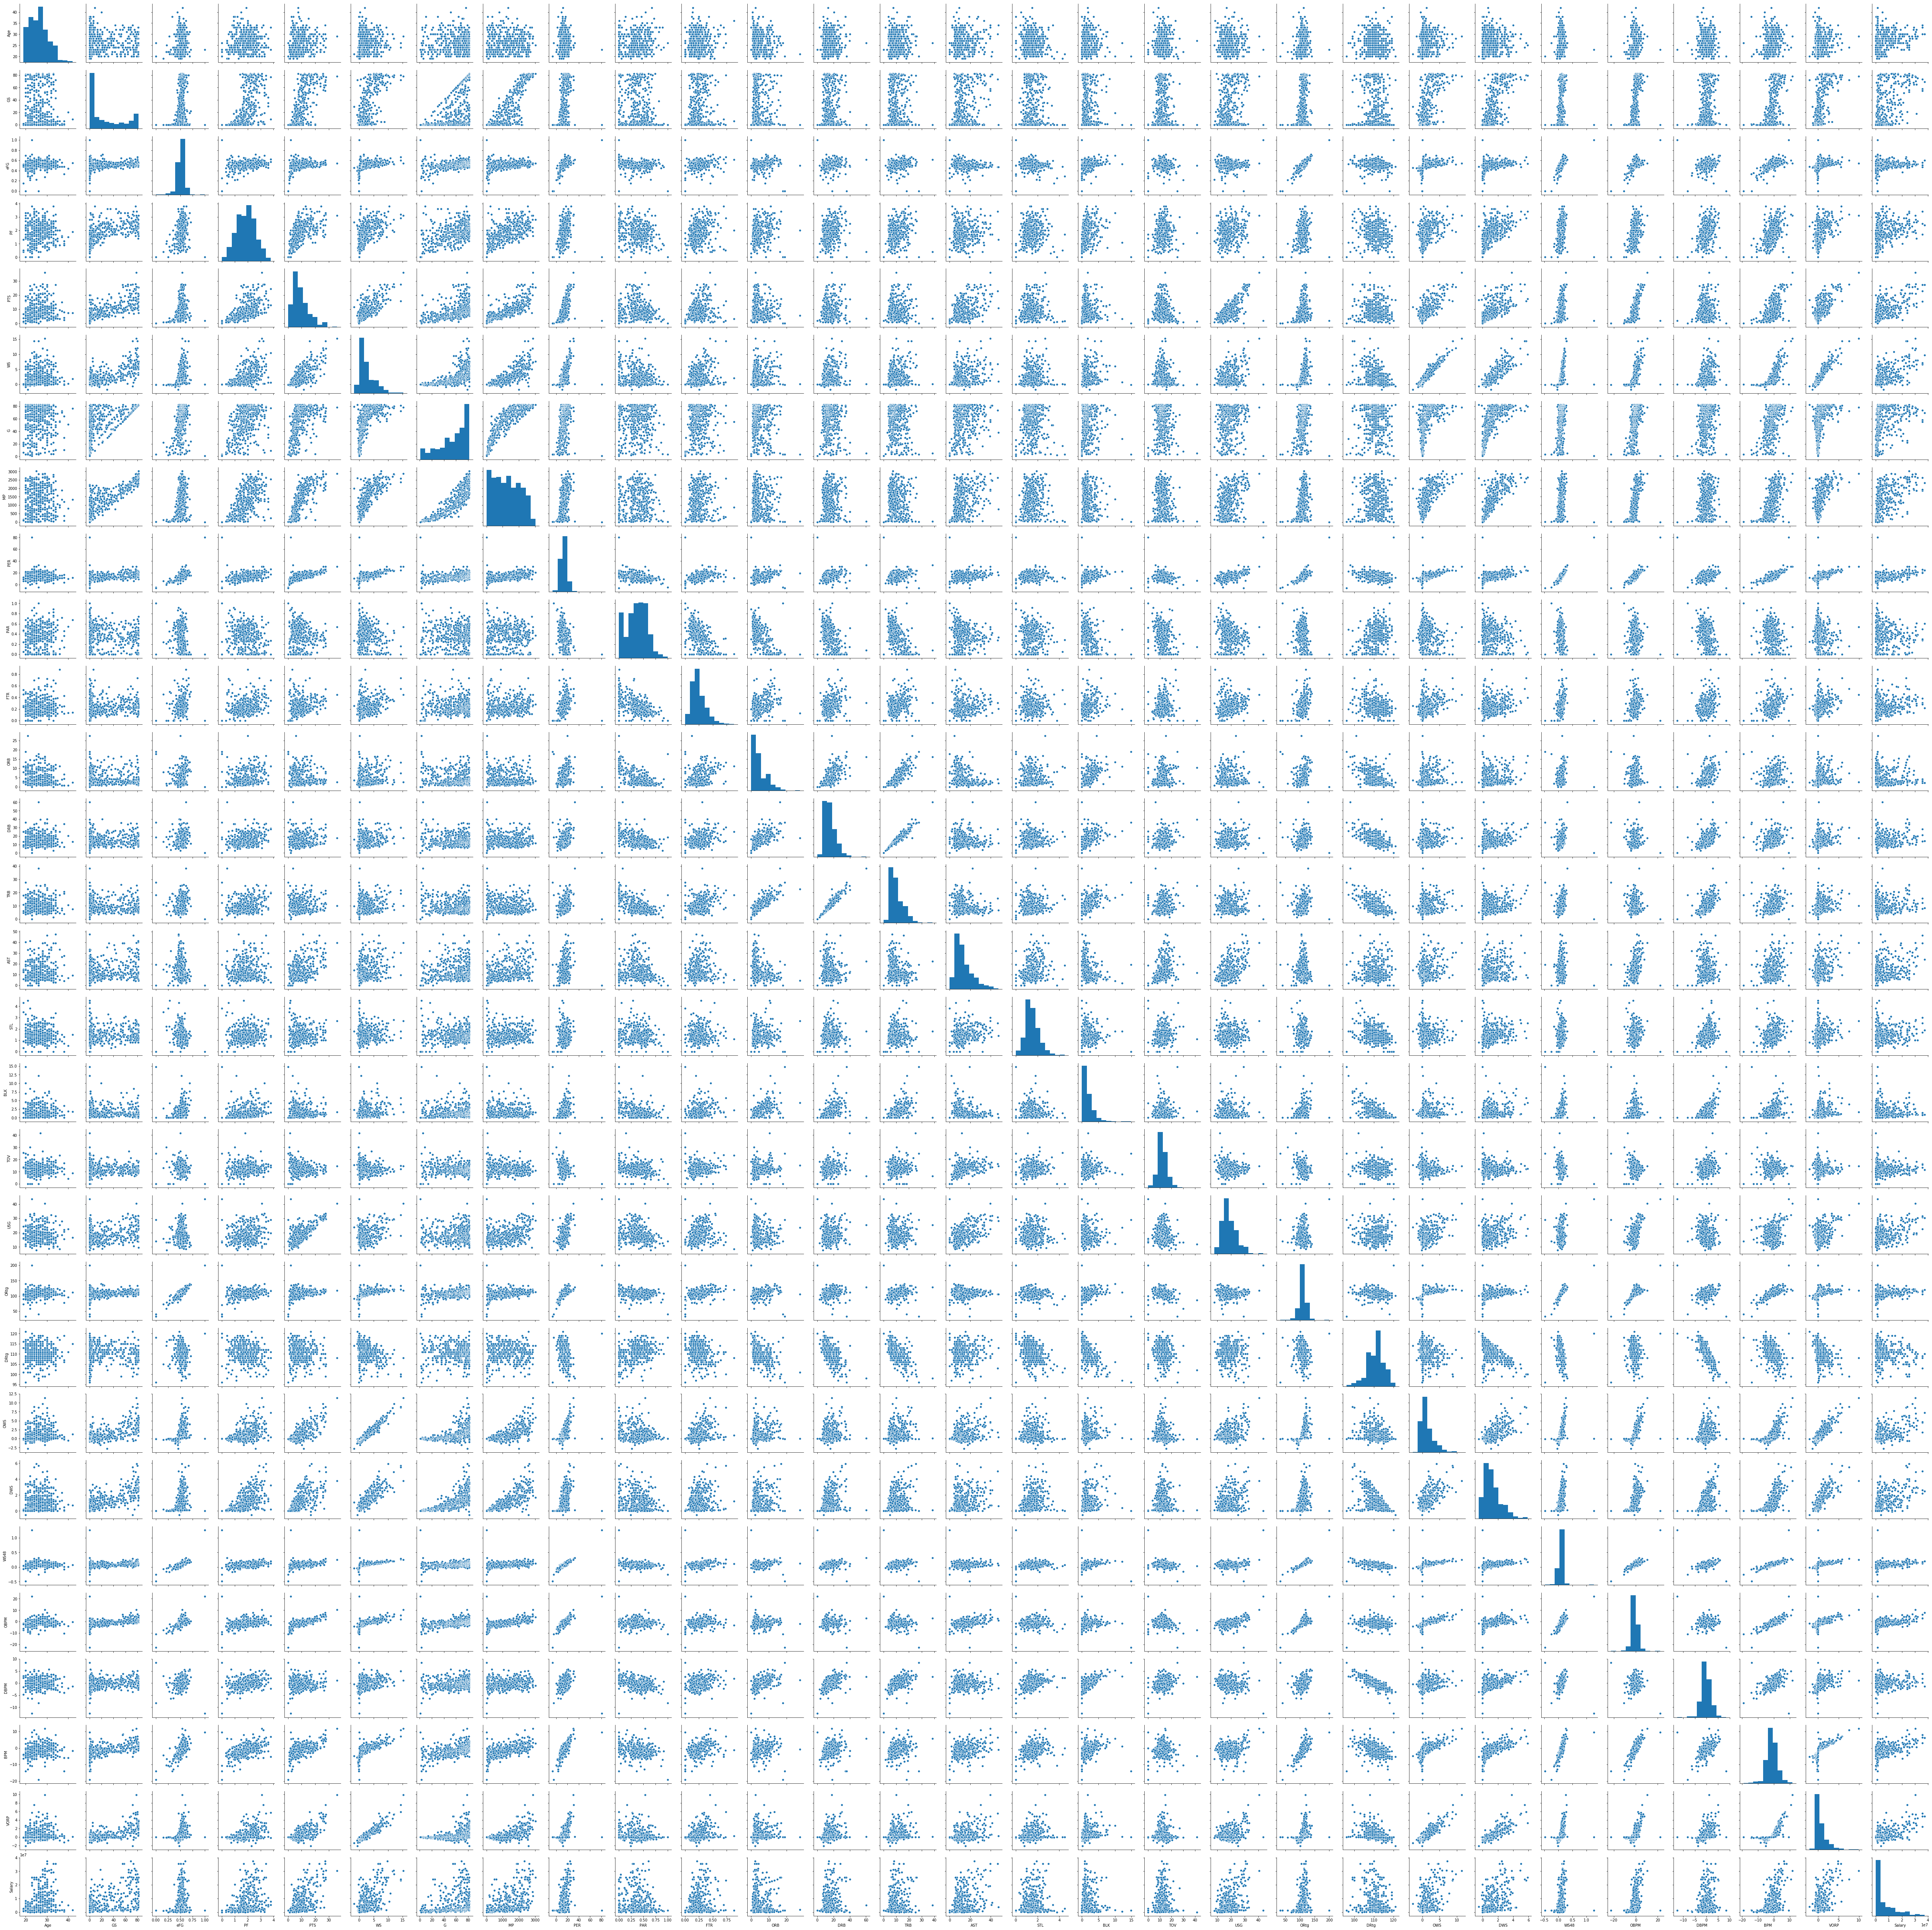

In [181]:
sns.pairplot(player_salary_num);

In [95]:
#original model
df = player_salary_num.copy()
X, y = df.drop(columns = ['Salary']), df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train = sm.add_constant(X_train, has_constant='add') #something already has a variance of 0

model = sm.OLS(y_train, X_train)

fit = model.fit()

X_test = sm.add_constant(X_test, has_constant='add') 
y_pred = fit.predict(X_test)
print('R^2 Score for Test: ' + str(round(r2_score(y_test, y_pred), 2)))

fit.summary()

/Users/kessiezhang/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


R^2 Score for Test: 0.35


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     15.59
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           2.29e-43
Time:                        14:50:55   Log-Likelihood:                -5540.6
No. Observations:                 328   AIC:                         1.114e+04
Df Residuals:                     299   BIC:                         1.125e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.578e+06   4.85e+07     -0.136      0.892   -1.02e+08    8.89e+07
Age         4.887e+05   7.56e+04      6.464      0.000     3.4e+05    6.37e+05
GS          2.838e+04   2.48e+04      1.144      0.253   -2.04e+04    7.72e+04
eFG         -2.95e+06   1.61e+07     -0.183      0.855   -3.47e+07    2.88e+07
PF         -2.164e+06   8.58e+05     -2.522      0.012   -3.85e+06   -4.76e+05
PTS         5.916e+05   2.52e+05      2.345      0.020    9.51e+04    1.09e+06
WS           6.29e+06   6.63e+06      0.949      0.343   -6.75e+06    1.93e+07
G          -8.232e+04   4.77e+04     -1.726      0.085   -1.76e+05    1.15e+04
MP          -118.2937   2167.035     -0.055      0.957   -4382.867    4146.279
PER        -7.802e+05   7.29e+05     -1.070      0.285   -2.21e+06    6.54e+05
PAR        -6.017e+06   4.53e+06     -1.328      0.185   -1.49e+07     2.9e+06
FTR          2.35e+06   3.65e+06      0.643      0.521   -4.84e+06    9.54e+06
ORB         2.599e+06   1.33e+06      1.958      0.051   -1.35e+04    5.21e+06
DRB         2.689e+06   1.36e+06      1.975      0.049    1.01e+04    5.37e+06
TRB        -4.978e+06   2.73e+06     -1.821      0.070   -1.04e+07    4.01e+05
AST        -2593.3674   1.05e+05     -0.025      0.980   -2.08e+05    2.03e+05
STL         4.645e+05   1.11e+06      0.417      0.677   -1.73e+06    2.66e+06
BLK         2.026e+05   5.71e+05      0.355      0.723   -9.21e+05    1.33e+06
TOV         1.701e+05    1.5e+05      1.132      0.259   -1.26e+05    4.66e+05
USG        -6.674e+04   3.25e+05     -0.205      0.838   -7.07e+05    5.73e+05
ORtg        -2.53e+05   1.55e+05     -1.628      0.105   -5.59e+05    5.29e+04
DRtg        3.123e+05   3.69e+05      0.847      0.398   -4.14e+05    1.04e+06
OWS        -6.096e+06   6.66e+06     -0.915      0.361   -1.92e+07    7.01e+06
DWS        -3.203e+06   6.67e+06     -0.480      0.632   -1.63e+07    9.93e+06
WS48         3.06e+07    3.9e+07      0.785      0.433   -4.62e+07    1.07e+08
OBPM        9.435e+06   6.04e+06      1.563      0.119   -2.45e+06    2.13e+07
DBPM        7.852e+06   6.16e+06      1.274      0.204   -4.28e+06       2e+07
BPM        -7.558e+06   6.07e+06     -1.246      0.214   -1.95e+07    4.38e+06
VORP       -5.105e+05   1.02e+06     -0.502      0.616   -2.51e+06    1.49e+06
==============================================================================
Omnibus:                       15.638   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.251
Skew:                           0.379   Prob(JB):                     2.43e-05
Kurtosis:                       3.990   Cond. No.                     2.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [98]:
#original model with less outliers in target variable
#the model perform worst than before 
df = player_salary_num.copy()
q1 = player_salary_num['Salary'].quantile(.25)
q3 = player_salary_num['Salary'].quantile(.75)
iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

quartile_mask = df['Salary'].between(lower_bound, upper_bound, inclusive=True)
allowed_idx = df.loc[quartile_mask, 'Salary'].index
df = df[df.index.isin(allowed_idx)]

X, y = df.drop(columns = ['Salary']), df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train = sm.add_constant(X_train, has_constant='add') #something already has a variance of 0
model = sm.OLS(y_train, X_train)

fit = model.fit()

X_test = sm.add_constant(X_test, has_constant='add') 
y_pred = fit.predict(X_test)
print('R^2 Score for Test: ' + str(round(r2_score(y_test, y_pred), 2)))

fit.summary()

R^2 Score for Test: 0.26


/Users/kessiezhang/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     6.506
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           6.34e-18
Time:                        14:51:21   Log-Likelihood:                -5091.0
No. Observations:                 304   AIC:                         1.024e+04
Df Residuals:                     275   BIC:                         1.035e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.557e+07   4.61e+07     -0.555      0.579   -1.16e+08    6.52e+07
Age         4.092e+05   6.95e+04      5.886      0.000    2.72e+05    5.46e+05
GS          1.691e+04   2.31e+04      0.733      0.464   -2.85e+04    6.23e+04
eFG        -8.155e+06   1.41e+07     -0.579      0.563   -3.59e+07    1.96e+07
PF         -1.073e+06   7.77e+05     -1.380      0.169    -2.6e+06    4.58e+05
PTS         1.986e+05   2.47e+05      0.804      0.422   -2.88e+05    6.85e+05
WS          1.118e+07   5.96e+06      1.876      0.062   -5.49e+05    2.29e+07
G          -8.566e+04   4.45e+04     -1.927      0.055   -1.73e+05    1868.764
MP           841.0215   2048.508      0.411      0.682   -3191.728    4873.771
PER        -3.083e+04   6.39e+05     -0.048      0.962   -1.29e+06    1.23e+06
PAR        -4.713e+06   4.17e+06     -1.130      0.259   -1.29e+07     3.5e+06
FTR        -5.695e+04   3.11e+06     -0.018      0.985   -6.17e+06    6.06e+06
ORB         2.502e+05   1.26e+06      0.198      0.843   -2.24e+06    2.74e+06
DRB         2.808e+05   1.29e+06      0.217      0.828   -2.27e+06    2.83e+06
TRB        -4.986e+05   2.59e+06     -0.193      0.847   -5.59e+06     4.6e+06
AST        -1.328e+05   9.17e+04     -1.449      0.149   -3.13e+05    4.77e+04
STL         6.121e+05   1.01e+06      0.607      0.544   -1.37e+06     2.6e+06
BLK        -4537.4277   4.99e+05     -0.009      0.993   -9.87e+05    9.78e+05
TOV         1.706e+05   1.32e+05      1.294      0.197    -8.9e+04     4.3e+05
USG        -3.416e+04    2.8e+05     -0.122      0.903   -5.85e+05    5.17e+05
ORtg       -4.265e+04   1.34e+05     -0.319      0.750   -3.06e+05     2.2e+05
DRtg        2.998e+05   3.53e+05      0.850      0.396   -3.95e+05    9.94e+05
OWS        -1.066e+07   5.97e+06     -1.786      0.075   -2.24e+07    1.09e+06
DWS        -7.934e+06      6e+06     -1.323      0.187   -1.97e+07    3.87e+06
WS48       -1.723e+07    3.6e+07     -0.479      0.632   -8.81e+07    5.36e+07
OBPM        8.323e+06   5.57e+06      1.493      0.136   -2.65e+06    1.93e+07
DBPM        7.546e+06   5.67e+06      1.332      0.184   -3.61e+06    1.87e+07
BPM        -7.112e+06   5.59e+06     -1.273      0.204   -1.81e+07    3.89e+06
VORP       -1.591e+06   1.11e+06     -1.440      0.151   -3.77e+06    5.84e+05
==============================================================================
Omnibus:                       16.109   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.170
Skew:                           0.544   Prob(JB):                     0.000187
Kurtosis:                       3.416   Cond. No.                     2.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [100]:
#log model

df = player_salary_num.copy()
X, y = df.drop(columns = ['Salary']), df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train = sm.add_constant(X_train, has_constant='add') #something already has a variance of 0

model = sm.OLS(np.log(y_train), X_train)

X_test = sm.add_constant(X_test, has_constant='add') 
fit = model.fit() 
y_pred = fit.predict(X_test)
#unlog y_pred before you compare it to y_test
y_pred=np.exp(y_pred)
print('R^2 Score for Test: ' + str(round(r2_score(y_test, y_pred), 2)))


fit.summary()

R^2 Score for Test: 0.36


/Users/kessiezhang/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     10.09
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           3.16e-29
Time:                        14:53:40   Log-Likelihood:                -475.55
No. Observations:                 328   AIC:                             1009.
Df Residuals:                     299   BIC:                             1119.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.1303      9.536      2.740      0.007       7.365      44.896
Age            0.0735      0.015      4.946      0.000       0.044       0.103
GS             0.0065      0.005      1.338      0.182      -0.003       0.016
eFG            1.0099      3.171      0.319      0.750      -5.230       7.249
PF            -0.0638      0.169     -0.378      0.706      -0.396       0.268
PTS           -0.0390      0.050     -0.787      0.432      -0.137       0.059
WS             1.6229      1.303      1.245      0.214      -0.941       4.187
G             -0.0054      0.009     -0.573      0.567      -0.024       0.013
MP          7.023e-05      0.000      0.165      0.869      -0.001       0.001
PER           -0.0724      0.143     -0.505      0.614      -0.354       0.210
PAR           -2.1640      0.891     -2.429      0.016      -3.917      -0.411
FTR            0.6772      0.718      0.943      0.347      -0.737       2.091
ORB            0.2533      0.261      0.970      0.333      -0.260       0.767
DRB            0.3117      0.268      1.165      0.245      -0.215       0.838
TRB           -0.5749      0.537     -1.070      0.286      -1.632       0.483
AST           -0.0231      0.021     -1.124      0.262      -0.064       0.017
STL           -0.2227      0.219     -1.016      0.310      -0.654       0.208
BLK            0.0499      0.112      0.444      0.657      -0.171       0.271
TOV            0.0299      0.030      1.013      0.312      -0.028       0.088
USG           -0.0071      0.064     -0.111      0.911      -0.133       0.119
ORtg          -0.0889      0.031     -2.908      0.004      -0.149      -0.029
DRtg          -0.0100      0.073     -0.138      0.890      -0.153       0.133
OWS           -1.4586      1.309     -1.114      0.266      -4.034       1.117
DWS           -1.0170      1.311     -0.775      0.439      -3.598       1.564
WS48          -4.1695      7.667     -0.544      0.587     -19.257      10.918
OBPM           0.7363      1.187      0.620      0.535      -1.599       3.072
DBPM           0.0899      1.212      0.074      0.941      -2.294       2.474
BPM            0.0337      1.192      0.028      0.978      -2.313       2.380
VORP          -0.5713      0.200     -2.856      0.005      -0.965      -0.178
==============================================================================
Omnibus:                       83.514   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.087
Skew:                          -1.185   Prob(JB):                     3.61e-49
Kurtosis:                       6.272   Cond. No.                     2.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [105]:
player_salary_num.describe()

Age          GS         eFG          PF         PTS          WS  \
count  411.000000  411.000000  411.000000  411.000000  411.000000  411.000000   
mean    26.267640   26.615572    0.511161    1.851338    9.376156    2.688564   
std      4.286837   28.844633    0.081234    0.728491    6.103539    2.804916   
min     19.000000    0.000000    0.000000    0.000000    0.000000   -1.700000   
25%     23.000000    1.000000    0.480000    1.400000    5.000000    0.500000   
50%     26.000000   14.000000    0.513000    1.800000    7.700000    1.900000   
75%     29.000000   52.000000    0.553500    2.300000   12.050000    3.900000   
max     42.000000   82.000000    1.000000    3.800000   36.100000   15.200000   

                G           MP         PER         PAR  ...        ORtg  \
count  411.000000   411.000000  411.000000  411.000000  ...  411.000000   
mean    55.116788  1273.527981   13.620438    0.366968  ...  108.486618   
std     22.607165   799.252279    6.139538    0.206797  ...   12.714566   
min      1.000000     1.000000   -6.000000    0.000000  ...   33.000000   
25%     42.000000   568.000000   10.400000    0.248500  ...  102.500000   
50%     61.000000  1250.000000   12.800000    0.377000  ...  109.000000   
75%     74.000000  1922.500000   16.700000    0.519000  ...  115.000000   
max     82.000000  3028.000000   80.400000    1.000000  ...  200.000000   

             DRtg         OWS         DWS        WS48        OBPM        DBPM  \
count  411.000000  411.000000  411.000000  411.000000  411.000000  411.000000   
mean   110.574209    1.390998    1.297324    0.086479   -1.024331   -0.198783   
std      4.168549    1.935948    1.112092    0.092910    3.020102    2.082792   
min     96.000000   -2.800000   -0.500000   -0.480000  -22.500000  -12.600000   
25%    108.000000    0.100000    0.400000    0.048000   -2.300000   -1.500000   
50%    111.000000    0.700000    1.100000    0.086000   -1.000000   -0.400000   
75%    113.000000    2.100000    1.900000    0.123000    0.250000    1.050000   
max    121.000000   11.400000    5.900000    1.261000   22.100000    8.500000   

              BPM        VORP        Salary  
count  411.000000  411.000000  4.110000e+02  
mean    -1.228954    0.664477  7.075251e+06  
std      3.565774    1.377486  8.139288e+06  
min    -19.200000   -2.100000  4.737000e+03  
25%     -3.000000   -0.100000  1.512601e+06  
50%     -1.200000    0.100000  3.275280e+06  
75%      0.750000    1.100000  1.027565e+07  
max     11.700000    9.900000  3.745715e+07  

[8 rows x 29 columns]

In [106]:
#log model with scaled and log-transformed independent variables

df = player_salary_num.copy()
log_cols = ['Salary', 'Age','PTS', 'FTR', 'PER','VORP']

for col in log_cols:
    
    df[col] = np.log(df[col] - min(df[col]) + 1 )


X, y = df.drop(columns = ['Salary']), df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train = sm.add_constant(X_train, has_constant='add') #something already has a variance of 0
model = sm.OLS(y_train, X_train)


fit = model.fit() 

X_test = sm.add_constant(X_test, has_constant='add') 
y_pred = fit.predict(X_test)
print('R^2 Score for Test: ' + str(round(r2_score(y_test, y_pred), 2)))

fit.summary()

R^2 Score for Test: 0.37


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     7.215
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.41e-20
Time:                        15:01:35   Log-Likelihood:                -541.84
No. Observations:                 328   AIC:                             1142.
Df Residuals:                     299   BIC:                             1252.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0110     10.530      3.895      0.000      20.288      61.734
Age            0.5642      0.137      4.110      0.000       0.294       0.834
GS             0.0078      0.006      1.289      0.199      -0.004       0.020
eFG            0.3959      3.687      0.107      0.915      -6.859       7.651
PF            -0.1142      0.213     -0.536      0.593      -0.534       0.305
PTS            0.2942      0.616      0.477      0.633      -0.918       1.507
WS             2.0478      1.600      1.279      0.202      -1.102       5.197
G              0.0056      0.011      0.511      0.610      -0.016       0.027
MP          1.819e-05      0.001      0.036      0.972      -0.001       0.001
PER           -2.1335      2.044     -1.044      0.298      -6.157       1.890
PAR           -3.0016      1.043     -2.877      0.004      -5.055      -0.949
FTR            0.8327      1.149      0.725      0.469      -1.428       3.093
ORB            0.2173      0.319      0.681      0.496      -0.410       0.845
DRB            0.2672      0.327      0.818      0.414      -0.376       0.910
TRB           -0.4747      0.656     -0.724      0.469      -1.765       0.815
AST           -0.0163      0.024     -0.687      0.493      -0.063       0.030
STL           -0.1267      0.212     -0.599      0.550      -0.543       0.290
BLK            0.1480      0.117      1.265      0.207      -0.082       0.378
TOV            0.0229      0.037      0.625      0.532      -0.049       0.095
USG           -0.0738      0.055     -1.342      0.181      -0.182       0.034
ORtg          -0.0647      0.038     -1.683      0.093      -0.140       0.011
DRtg          -0.0941      0.069     -1.371      0.171      -0.229       0.041
OWS           -2.0974      1.604     -1.307      0.192      -5.255       1.060
DWS           -1.6902      1.608     -1.051      0.294      -4.855       1.474
WS48          -7.3142      4.723     -1.549      0.123     -16.608       1.980
OBPM          -0.0887      1.461     -0.061      0.952      -2.965       2.787
DBPM          -0.9940      1.492     -0.666      0.506      -3.929       1.941
BPM            0.8814      1.461      0.603      0.547      -1.993       3.756
VORP          -1.2687      0.907     -1.399      0.163      -3.053       0.515
==============================================================================
Omnibus:                      328.004   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19074.080
Skew:                          -3.967   Prob(JB):                         0.00
Kurtosis:                      39.506   Cond. No.                     2.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [113]:
#solve multicollinarity
#log model with scaled and log-transformed independent variables

df = player_salary_num.copy()
log_cols = ['Salary', 'Age','PTS', 'FTR', 'PER','VORP']


for col in log_cols:
    
    df[col] = np.log(df[col] - min(df[col]) + 1 )
        
X, y = df.drop(columns = ['Salary']), df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

#standardize the data
scaler = StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scale,
                                    index = X_train.index,
                                    columns = X_train.columns)

X_test= pd.DataFrame(X_test_scale,
                                   index = X_test.index,
                                   columns = X_train.columns)

#add constant (intercept)
# X_train = sm.add_constant(X_train_scale, has_constant='add') 

X_train['intercept']=1
X_test['intercept']=1

model = sm.OLS(y_train, X_train)

fit = model.fit()

# X_test_scale = sm.add_constant(X_test, has_constant='add') 

y_pred = fit.predict(X_test)
print('R^2 Score for Test: ' + str(round(r2_score(y_test, y_pred), 2)))

fit.summary()

R^2 Score for Test: 0.37


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     7.215
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.41e-20
Time:                        16:51:26   Log-Likelihood:                -541.84
No. Observations:                 328   AIC:                             1142.
Df Residuals:                     299   BIC:                             1252.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.3369      0.082      4.110      0.000       0.176       0.498
GS             0.2200      0.171      1.289      0.199      -0.116       0.556
eFG            0.0306      0.285      0.107      0.915      -0.530       0.591
PF            -0.0831      0.155     -0.536      0.593      -0.388       0.222
PTS            0.1762      0.369      0.477      0.633      -0.550       0.902
WS             5.8168      4.546      1.279      0.202      -3.130      14.763
G              0.1248      0.244      0.511      0.610      -0.356       0.606
MP             0.0145      0.405      0.036      0.972      -0.783       0.812
PER           -0.5730      0.549     -1.044      0.298      -1.654       0.508
PAR           -0.6132      0.213     -2.877      0.004      -1.033      -0.194
FTR            0.0824      0.114      0.725      0.469      -0.141       0.306
ORB            0.8245      1.210      0.681      0.496      -1.557       3.206
DRB            1.7949      2.195      0.818      0.414      -2.524       6.114
TRB           -2.3061      3.184     -0.724      0.469      -8.572       3.960
AST           -0.1364      0.199     -0.687      0.493      -0.527       0.255
STL           -0.0836      0.140     -0.599      0.550      -0.359       0.191
BLK            0.2337      0.185      1.265      0.207      -0.130       0.597
TOV            0.0948      0.152      0.625      0.532      -0.204       0.393
USG           -0.4029      0.300     -1.342      0.181      -0.994       0.188
ORtg          -0.7937      0.472     -1.683      0.093      -1.722       0.135
DRtg          -0.3914      0.286     -1.371      0.171      -0.953       0.170
OWS           -4.1398      3.167     -1.307      0.192     -10.372       2.092
DWS           -1.8889      1.797     -1.051      0.294      -5.425       1.648
WS48          -0.6829      0.441     -1.549      0.123      -1.551       0.185
OBPM          -0.2599      4.283     -0.061      0.952      -8.688       8.168
DBPM          -2.0318      3.049     -0.666      0.506      -8.032       3.968
BPM            3.1291      5.185      0.603      0.547      -7.075      13.333
VORP          -0.3943      0.282     -1.399      0.163      -0.949       0.160
intercept     15.0042      0.073    205.517      0.000      14.861      15.148
==============================================================================
Omnibus:                      328.004   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19074.080
Skew:                          -3.967   Prob(JB):                         0.00
Kurtosis:                      39.506   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [147]:
#solve multicollinarity
#log model with scaled and log-transformed independent variables

df = player_salary_num.drop(['MP','eFG','PF','OBPM','PTS','FTR','WS'
                             ,'OWS','TRB','ORB','STL','TOV'
                            ,'AST','G','USG','DRtg','BLK','DRB','PER'],axis=1)


log_cols = ['Salary', 'Age','VORP']


for col in log_cols:
    
    df[col] = np.log(df[col] - min(df[col]) + 1 )
        
X, y = df.drop(columns = ['Salary']), df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

#standardize the data
scaler = StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scale,
                                    index = X_train.index,
                                    columns = X_train.columns)

X_test= pd.DataFrame(X_test_scale,
                                   index = X_test.index,
                                   columns = X_train.columns)

#add constant (intercept)
# X_train = sm.add_constant(X_train_scale, has_constant='add') 

X_train['intercept']=1
X_test['intercept']=1

model = sm.OLS(y_train, X_train)

fit = model.fit()

# X_test_scale = sm.add_constant(X_test, has_constant='add') 

y_pred = fit.predict(X_test)
print('R^2 Score for Test: ' + str(round(r2_score(y_test, y_pred), 2)))
print(sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
print(metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))

fit.summary()

R^2 Score for Test: 0.36
5909480.386169058
3871903.852069717


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     21.22
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           5.08e-28
Time:                        17:21:40   Log-Likelihood:                -549.36
No. Observations:                 328   AIC:                             1119.
Df Residuals:                     318   BIC:                             1157.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.3501      0.077      4.564      0.000       0.199       0.501
GS             0.2756      0.118      2.327      0.021       0.043       0.509
PAR           -0.1927      0.089     -2.164      0.031      -0.368      -0.018
ORtg          -0.3446      0.165     -2.088      0.038      -0.669      -0.020
DWS            0.4962      0.145      3.418      0.001       0.211       0.782
WS48          -0.4194      0.179     -2.342      0.020      -0.772      -0.067
DBPM          -0.5261      0.133     -3.942      0.000      -0.789      -0.264
BPM            1.3179      0.247      5.343      0.000       0.833       1.803
VORP          -0.4249      0.160     -2.659      0.008      -0.739      -0.111
intercept     15.0042      0.072    207.146      0.000      14.862      15.147
==============================================================================
Omnibus:                      337.371   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20684.348
Skew:                          -4.142   Prob(JB):                         0.00
Kurtosis:                      41.011   Cond. No.                         8.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
def distplot(df, feature, size):
    sns.distplot(df[feature])
    plt.xlabel(f'{feature}', size = size)
    plt.title(f'The distribution of {feature}', size = size)

In [50]:
def distplot_log(df, feature, size):  
    '''
    Plots the log distribution of a numberical feature
    from df
    '''
    sns.distplot(np.log(df[feature]))
    plt.xlabel(f'{feature}', size = size)
    plt.title(f'The log distribution of {feature}', size = size)

In [52]:
# Salary
df = nba_data.copy()
size = 100000

plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
dist_price = distplot(df, 'Salary', size)
plt.xlabel('Salary', size = 20)
# plt.xlim([0,10000])
plt.title('Salary Distribution', size = 20)

plt.subplot(1,2,2)
dist_logprice = distplot_log(df, 'Salary', size = 20)
plt.xlabel('Log-Salary')
plt.title('Log-Salary Distribution', size = 20)
# plt.xlim([0,10])

plt.tight_layout()
# plt.savefig('Salary Distribution.png', bbox_inches = 'tight', dpi = 300)

In [144]:
lm = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state = 42)

scores = cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2')

print('R^2 Scores Across Folds:')
print(scores)
print(f'\nSimple Mean CV R^2: {np.mean(scores):.3f} +- {np.std(scores):.3f}')

lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print('\nR^2 Score for Test: ' + str(round(r2_score(y_test, y_pred), 2)))

print(sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
print(metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))

R^2 Scores Across Folds:
[0.31809903 0.34155867 0.42848363 0.42389356 0.18880686]

Simple Mean CV R^2: 0.340 +- 0.087

R^2 Score for Test: 0.36
5909480.386168964
3871903.852069648


In [145]:
#lasso
#Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-2,2,200)

kf = KFold(n_splits=5, shuffle=True, random_state = 42)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train, y_train)

#This is the best alpha value it found - not far from the value
#selected using simple validation
best_lasso_alpha = lasso_model.alpha_
print('Best alpha value for LASSO: ' + str(best_lasso_alpha))

#These are the (standardized) coefficients found
#when it refit using that best alpha
print('\nBeta Coefficients for LASSO:')
# pp.pprint(list(zip(X.columns, lasso_model.coef_)))

lasso_model = Lasso(alpha = best_lasso_alpha)

scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='r2')

print('\nR^2 Scores Across Folds:')
print(scores)
print(f'\nSimple Mean CV R^2: {np.mean(scores):.3f} +- {np.std(scores):.3f}')

lasso_model.fit(X_train, y_train)

#Make predictions on the test set using the new model
y_pred = lasso_model.predict(X_test)
print('\nLASSO R^2 Score for Test: ' + str(round(r2_score(y_test, y_pred), 2)))

print(sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
print(metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))

Best alpha value for LASSO: 0.01

Beta Coefficients for LASSO:

R^2 Scores Across Folds:
[0.37571272 0.36833034 0.42525013 0.39401954 0.18529381]

Simple Mean CV R^2: 0.350 +- 0.085

LASSO R^2 Score for Test: 0.35
5867715.586182926
3868491.8562243623


In [146]:
alphavec = 10**np.linspace(-2,2,200)

kf = KFold(n_splits=5, shuffle=True, random_state = 42)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train, y_train)

#This is the best alpha value it found - not far from the value
#selected using simple validation
best_ridge_alpha = ridge_model.alpha_
print('\nBest alpha value for Ridge: ' + str(best_ridge_alpha))

#These are the (standardized) coefficients found
#when it refit using that best alpha
print('\nBeta Coefficients for Ridge:')
# pp.pprint(list(zip(X.columns, ridge_model.coef_)))

ridge_model = Ridge(alpha = best_ridge_alpha)

scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='r2')

print('\nR^2 Scores Across Folds:')
print(scores)
print(f'\nSimple Mean CV R^2: {np.mean(scores):.3f} +- {np.std(scores):.3f}')

ridge_model.fit(X_train, y_train)


#Make predictions on the test set using the new model
y_pred = ridge_model.predict(X_test)
print('\nRidge R^2 Score for Test: ' + str(round(r2_score(y_test, y_pred), 2)))

print(sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
print(metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))


Best alpha value for Ridge: 7.488103857590023

Beta Coefficients for Ridge:

R^2 Scores Across Folds:
[0.41083915 0.37073708 0.41929207 0.39105786 0.18671836]

Simple Mean CV R^2: 0.356 +- 0.086

Ridge R^2 Score for Test: 0.35
5844562.681597679
3852038.506968464


/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Conclusion:

After comparing different models based on r^2 scores and MAE, OLS gives me the best result. 

In [176]:
df = player_salary_num.drop(['MP','eFG','PF','OBPM','PTS','FTR','WS'
                             ,'OWS','TRB','ORB','STL','TOV'
                            ,'AST','G','USG','DRtg','BLK','DRB','PER'],axis=1)


# log_cols = ['Salary', 'Age','VORP']


# for col in log_cols:
    
#     df[col] = np.log(df[col] - min(df[col]) + 1 )
        
X, y = df.drop(columns = ['Salary']), df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

#standardize the data
scaler = StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scale,
                                    index = X_train.index,
                                    columns = X_train.columns)

X_test= pd.DataFrame(X_test_scale,
                                   index = X_test.index,
                                   columns = X_train.columns)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print('\nR^2 Score for Test: ' + str(round(r2_score(y_test, y_pred), 2)))

print(sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.mean_absolute_error(y_test, y_pred))

# print(sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
# print(metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))


R^2 Score for Test: 0.35
6216545.675982559
4801595.0313169435


In [180]:
coefs = list(zip(X.columns, lm.coef_/scaler.scale_))
coefs = sorted(coefs, key=lambda x:x[1], reverse = True)
coefs

[('BPM', 1458584.4132734824),
 ('VORP', 1312581.4597512556),
 ('DWS', 903945.78999562),
 ('Age', 520199.97321079124),
 ('GS', 45460.31606480099),
 ('ORtg', -256532.84844528872),
 ('DBPM', -1276447.4898837297),
 ('PAR', -6280421.888883815),
 ('WS48', -8251778.188655493)]

To interpret the beta coefficients, we first exponential transform the standard deviations of independent variables that were log transformed.
We then divide each feature's beta coefficient value by each feature's original standard deviation.

Next, we must exponential transform our beta coefficients since we applied a log transform to the dependent variable.

The results indicate that:

* for every additional score in basketball box score-based metric (BPM), which means a player's contribution to the team when that player is on the court, the NBA player's salary increase by $1458584.

* for every additional point in value over replaced player (VORP), the NBA player's salary increase by $1312581.

* for every additional point in the number of wins a player produces for his team due to his defensive ability (DWS), the NBA player's salary increase by $903945.

* for every additional year in age, the NBA player's salary increase by $520199.

* for every additional time in game start (GS), the NBA player's salary increase by $45460.

* for every additional point in Offensive Rating (ORtg), the NBA player's salary increase by $256532.

* for every additional point in Defensive Real Plus-Minus (DBPM), which means a player's estimated on-court impact on team defensive performance, the NBA player's salary decrease by $1276447.

* for every additional point in average points plus assists plus rebounds (PAR), the NBA player's salary decrease by $6280421.

* for every additional point in the number for Win Shares a player produces every 48 minutes on the court, the NBA player's salary decrease by $8251778.





In [162]:
log_cols = ['Salary','Age','VORP']

scales = list(zip(X.columns, scaler.scale_))
scales = [np.exp(scale[1]) if scale[0] in log_cols else scale[1] for scale in scales]

coefs = list(zip(X.columns, np.exp(lm.coef_)/scales))
coefs = sorted(coefs, key=lambda x:x[1], reverse = True)
coefs

[('WS48', 7.041993225333693),
 ('PAR', 4.0369163724580455),
 ('DWS', 1.4697266442448524),
 ('BPM', 1.0522528186090854),
 ('Age', 0.7811680634543761),
 ('VORP', 0.47917708595147257),
 ('DBPM', 0.28909048625806577),
 ('ORtg', 0.05778904712815324),
 ('GS', 0.04658062422842877)]

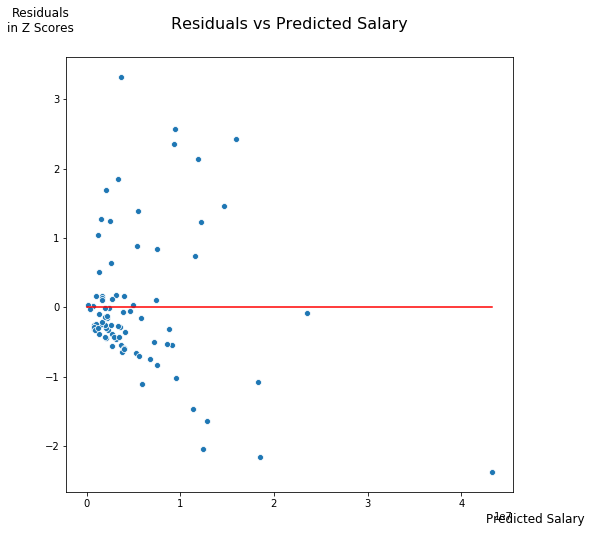

In [165]:
unscaled_y_pred = np.exp(y_pred)
unscaled_y_test = np.exp(y_test)
unscaled_resids = unscaled_y_test - unscaled_y_pred

resid_z_scores = (unscaled_resids-np.mean(unscaled_resids))/np.std(unscaled_resids)

plt.figure(figsize=(8,8))
sns.scatterplot(unscaled_y_pred, resid_z_scores);

plt.ylabel('Residuals\nin Z Scores', rotation = 0, fontsize = 12, y = 1.05);
plt.xlabel('Predicted Salary', fontsize=12, x=1.05);
plt.title('Residuals vs Predicted Salary',fontsize = 16, y = 1.05);
plt.plot([0, max(unscaled_y_pred)], [0, 0], linestyle="-", color='r');

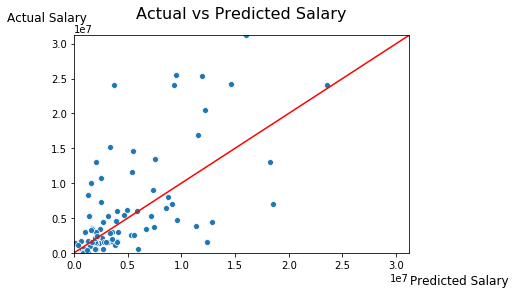

In [175]:
sns.scatterplot(unscaled_y_pred, unscaled_y_test);
plt.plot([0,max(unscaled_y_test)],[0, max(unscaled_y_test)], color='r');
plt.ylim([0, max(unscaled_y_test)]);
plt.xlim([0, max(unscaled_y_test)]);

plt.ylabel('Actual Salary', rotation = 0, fontsize = 12, y = 1.05);
plt.xlabel('Predicted Salary', fontsize=12, x=1.15);
plt.title('Actual vs Predicted Salary',fontsize = 16, y = 1.05);